# Wstęp teoretyczny

## Problem przepływowy

Problem flowshop (Flow Shop Scheduling Problem - FSSP) jest jednym z klasycznych zagadnień teorii harmonogramowania, mających na celu optymalizację procesu produkcyjnego. W klasycznej odsłonie (F||Cmax) należy do klasy najtrudniejszych, silnie NP-trudnych, problemów optymalizacji kombinatorycznej. 

Problem przepływowy z ciągłą pracą maszyn można sformułować w następujący sposób:

Istnieje zbiór zadań:
$$ J = {J_1, J_2, ..., J_n} $$

Które należy wykonać na maszynach:
$$ M = {M_1, M_2, ..., M_m}. $$

Każde z zadań $ J $ jest opisane ciągiem $ m $ operacji:

$$ O_{i,j} = {O_{i,1}, O_{i,2}, ..., O_{i,m}} $$

Przy czym każda z operacji $ O_{i,j} $ musi zostać wykonana na odpowiedniej maszynie $ M_j $ w czasie $ p_{i,j} $, oraz każda z operacji $ O_{i,j} $ może zostać wykonana dopiero, gdy zakończone zostaną wszystkie operacje poprzedzające tego zadania. Cały proces musi spełniać następujące zasady:

1. Każda operacja może być realizowana tylko przez jedną, określoną w technologii maszynę.
2. Każda maszyna może wykonywać w danym czasie tylko jedną operację.
3. Dla każdego zadania musi być zachowany określony technologiczny porządek operacji.
4. Żadna operacja nie może być przerwana do momentu jej ukończenia.
5. Wyróżnione maszyny muszą pracować w trybie ciągłym.
6. Zadania mogą być wykonywane niezależnie od siebie.

Rozwiązaniem problemu jest konkretna permutacja liczb $ {1, 2, ..., n} $ która poskutkuje najkrótszym czasem wykonania wszystkich zadań.



## Algorytm Genetyczny

Algorytm genetyczny (GA) jest iteracyjną metodą metaheurystyczną, która nie daje gwarancji znalezienia najlepszego rozwiązania. Ta metoda optymalizacji inspirowana jest procesem naturalnej ewolucji, a jej podstawą działania jest generowanie nowych $ Populacji $ poprzez przeprowadzanie podstawowych operacji inspirowanych naturalnym procesem. 

$ Osobnik $ - jedno rozwiązanie podjętego problemu.
$ Populacja $ - zbiór osobników określonego rozmiaru. 

Przebieg algorytmu genetycznego:

1. Inicjalizacja populacji

2. Następne kroki wykonywane są $ generacje $ razy:

    1. Faza $ Selekcji $

    1. Faza $ Krzyżowania $

    1. Faza $ Mutacji $

    1. Analiza i aktualizacja wyników

$ Selekcja $ - reprezentuje rywalizację między osobnikami o przetrwanie i możliwość reprodukcji, przekazania swoich genów. Podstawowym kryterium oceny siły osobnika jest jego wartość funkcji celu. W tym przypadku im mniejsza wartość funkcji celu, tym silniejszy osobnik. 

$ Krzyżowanie $ - reprezentuje proces powstawania osobników nowej populacji poprzez przekazywanie części genów rodziców. W ten sposób nowe osobniki otrzymują część genów każdego z rodziców i stanowią reprezentację różnych cech, podobnie jak ma to miejsce w naturze.

$ Mutacja $ - reprezentuje proces mutacji, które mogą zająć pod pewnym $ prawdopodobieństwem mutacji $. Proces zmienia w pewien losowy sposób osobnika, prowadząc do powstania nowych cech, które w losowy sposób wpływają na zdolność osobnika do przetrwania.


### Opis hiperparametrów algorytmu

rozmiar populacji - określa ilość osobników w populacji

częstotliwość mutacji - pewna wartość progowa z zakresu (0 - 100), określa z jakim prawdopodobieństwem będzie dochodziło do mutacji osobników.

generacje - liczba całkowita, określa ile razy ma przejść główna pętla algorytmu

##### Typ mutacji
W programie zostały zaimplementowane trzy typy mutacji:
1. soft (słaba) - polega na zamianie miejscami dwóch sąsiadów w permutacji
1. mid (średnia) - polega na zamianie miejscami dwóch losowych elementów w permutacji
1. hard (mocna) - dzieli osobnika na pół i zamienia powstałe tak ciągi kolejnością

##### Typ krzyżowania
W programie zostały zaimplementowane trzy typy krzyżowania:
1. simple (proste) - polega na połączeniu pierwszej połowy rodzica1 z drugą połową rodzica2
1. section (sekcjami) - polega na przekazaniu ciągu permutacji z rodzica1 do potomka i uzupełnienie reszty elementami w kolejności występowania w rodzicu 2
1. nearest (najbliższym sąsiadem) - krzyżowanie wybierające losowy ciąg z permutacji rodzica a resztę uzupełnia na zasadzie szeregowania zadań po długości czasu wykonania

##### Typ selekcji
Zaimplementowano dwa rodzaje selekcji
1. roulette (ruletkowa) - wybierającą określoną część osobników na podstawie prawdopodobieństwa ważonego względem jakości osobników
1. tournament (turniejowa) - polega na wyborze losowych osobników do grupy turniejowej a następnie przepuszcza do populacji tego o największej sile

In [18]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
from nehpy import neh
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Parametry dla algorytmu genetycznego

In [19]:
#Generuje zbiór danych wejściowych
J, _  = GenerateJ(100,5,5)

J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)

#Możliwe operatory genetyczne do dalszego przetwarzania
mutations = ["hard", "mid", "soft"]
crossovers = ["simple", "section", "sectionSP", "greedy"]
selections = ["roulette", "tournament"]

#Parametry algrytmu genetycznego
population_size = 50
mutation_rate = 0.2
generations = 2000

### Szukanie najlepszej kombinacji operatorów genetycznych

In [20]:
results = []
for J in J_list:
    nehcmax = neh(J.copy())
    for mutation in mutations:
        for crossover in crossovers:
            for selection in selections:
                ga = GeneticAlgorithm(copy.copy(J), 
                            population_size, 
                            mutation_rate, 
                            generations,
                            mutation_type=mutation, 
                            crossover_type=crossover, 
                            selection_type=selection,
                            register_all = False)
                best_solutions = ga.Genetic()
                for i in range(len(best_solutions)):
                    best_solution = best_solutions[i]
                    best_solution_Cmax = C_Max(J,best_solution)
                    percentage = (nehcmax - best_solution_Cmax)
                    percentage = percentage/nehcmax
                    percentage = percentage * 100
                    results.append({'kombinacja': mutation+"_"+crossover+"_"+selection, 'mutacja':mutation,'krzyżówka':crossover,'selekcja':selection,'generacja': i,'Cmax': best_solution_Cmax, 'Względne odchylenie procentowe [%]': percentage})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)



In [21]:
df.to_csv('data_combinations_results.csv', index=False)
df.head(10)

,kombinacja,mutacja,krzyżówka,selekcja,generacja,Cmax,lepszość [%]
0,hard_simple_roulette,hard,simple,roulette,0,181,-4.022989
1,hard_simple_roulette,hard,simple,roulette,1,181,-4.022989
2,hard_simple_roulette,hard,simple,roulette,2,181,-4.022989
3,hard_simple_roulette,hard,simple,roulette,3,181,-4.022989
4,hard_simple_roulette,hard,simple,roulette,4,181,-4.022989
5,hard_simple_roulette,hard,simple,roulette,5,181,-4.022989
6,hard_simple_roulette,hard,simple,roulette,6,176,-1.149425
7,hard_simple_roulette,hard,simple,roulette,7,176,-1.149425
8,hard_simple_roulette,hard,simple,roulette,8,176,-1.149425
9,hard_simple_roulette,hard,simple,roulette,9,176,-1.149425


#### Poszukiewanie kombinacji która średnio wypada najlepiej

In [22]:
final = df[df["generacja"].isin([df["generacja"].max()])]
mean_for_each_config_final = final.groupby(['kombinacja','mutacja','krzyżówka','selekcja'],as_index=False).agg({'Względne odchylenie procentowe [%]':'mean'})

mean_for_each_config = df.groupby(['kombinacja','mutacja','krzyżówka','selekcja','generacja'],as_index=False).agg({'Względne odchylenie procentowe [%]':'mean'})

final_1 = mean_for_each_config_final[mean_for_each_config_final["Względne odchylenie procentowe [%]"].isin([mean_for_each_config_final["Względne odchylenie procentowe [%]"].max()])]

print("kombinacja która wypadła średnio najlepiej:")
print(final_1)

kombinacja która wypadła średnio najlepiej:
                  kombinacja mutacja  krzyżówka    selekcja  lepszość [%]
11  mid_sectionSP_tournament     mid  sectionSP  tournament        1.0113


#### Poszukiwanie kombinacji która wypadła najlepiej

In [23]:
final_2 = df[df["Względne odchylenie procentowe [%]"].isin([df["Względne odchylenie procentowe [%]"].max()])]
final_2 = final_2[final_2["generacja"]==final_2["generacja"].max()]
print("kombinacje które uzyskały największe wyniki:")
print(final_2)

mean_for_each_config_final = final_2['Względne odchylenie procentowe [%]'].max()
print("Wynik:",mean_for_each_config_final)


kombinacje które uzyskały największe wyniki:
                       kombinacja mutacja  krzyżówka    selekcja  generacja  \
203999  hard_sectionSP_tournament    hard  sectionSP  tournament       1999   
211999      mid_simple_tournament     mid     simple  tournament       1999   
219999   mid_sectionSP_tournament     mid  sectionSP  tournament       1999   
231999    soft_section_tournament    soft    section  tournament       1999   

        Cmax  lepszość [%]  
203999   145      5.228758  
211999   145      5.228758  
219999   145      5.228758  
231999   145      5.228758  
Wynik: 5.228758169934641


In [24]:
import warnings
# warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

warnings.filterwarnings(
    action="ignore",
    message=r"When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning\.",
    category=FutureWarning,
)


#### Wyświetlenie wykresów dla wszystkich kombinacji posegregowane typem mutacji
### [1] kombinacje z typem mutacji "hard"
### [2] kombinacje z typem mutacji "mid"
### [3] kombinacje z typem mutacji "soft"

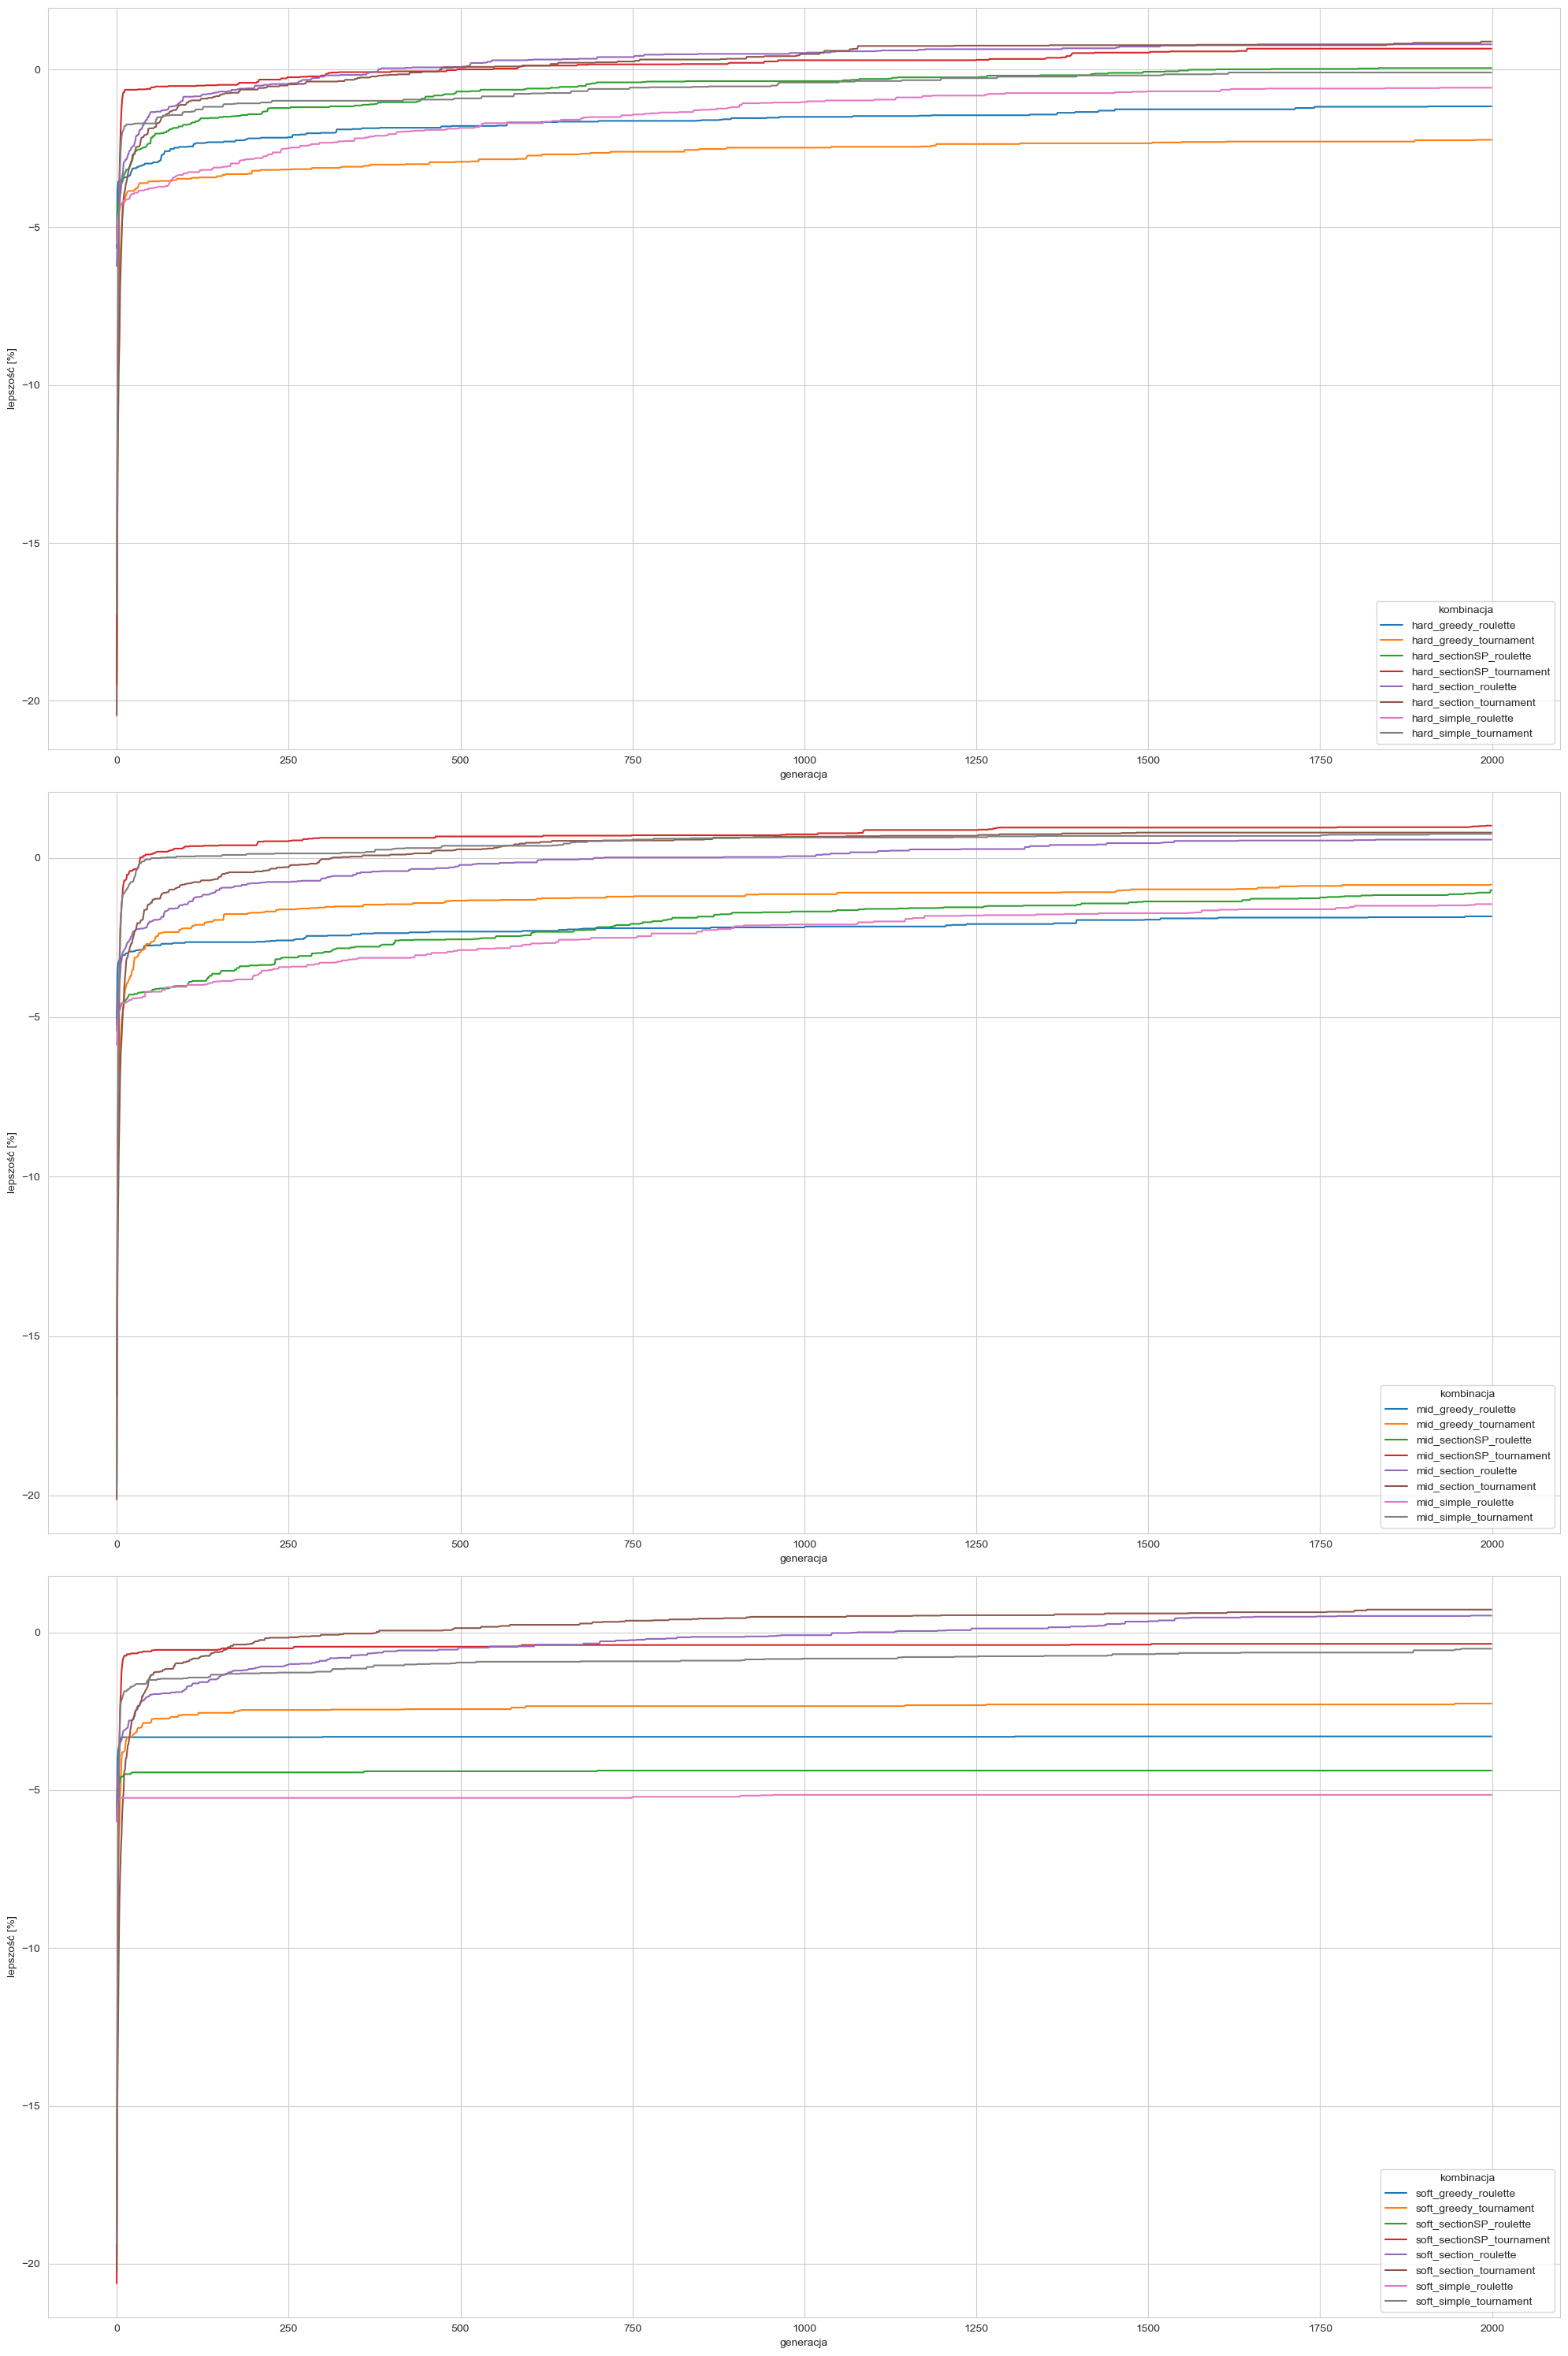

In [25]:
splitby = 'mutacja' 
categories = mean_for_each_config[splitby]
categories = categories.unique()

sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig,axis = plt.subplots(len(categories),1,figsize=(20, 10*len(categories)))
for i in range(len(categories)):
    # print(mean_for_each_config[mean_for_each_config[splitby]==category].head(4))
    sns.lineplot(ax=axis[i], x = "generacja", y = "Względne odchylenie procentowe [%]", data=mean_for_each_config[mean_for_each_config[splitby]==categories[i]], hue='kombinacja')

plt.tight_layout()
plt.show()


### Wybrane najlepsze kombinacje

Wybrano dwie kombinacje które średnio wypadały najlepiej, oraz dwie takie które wypadły ogólnie najlepiej.

### [4] zestawienie najlepiej wypadających kombinacji

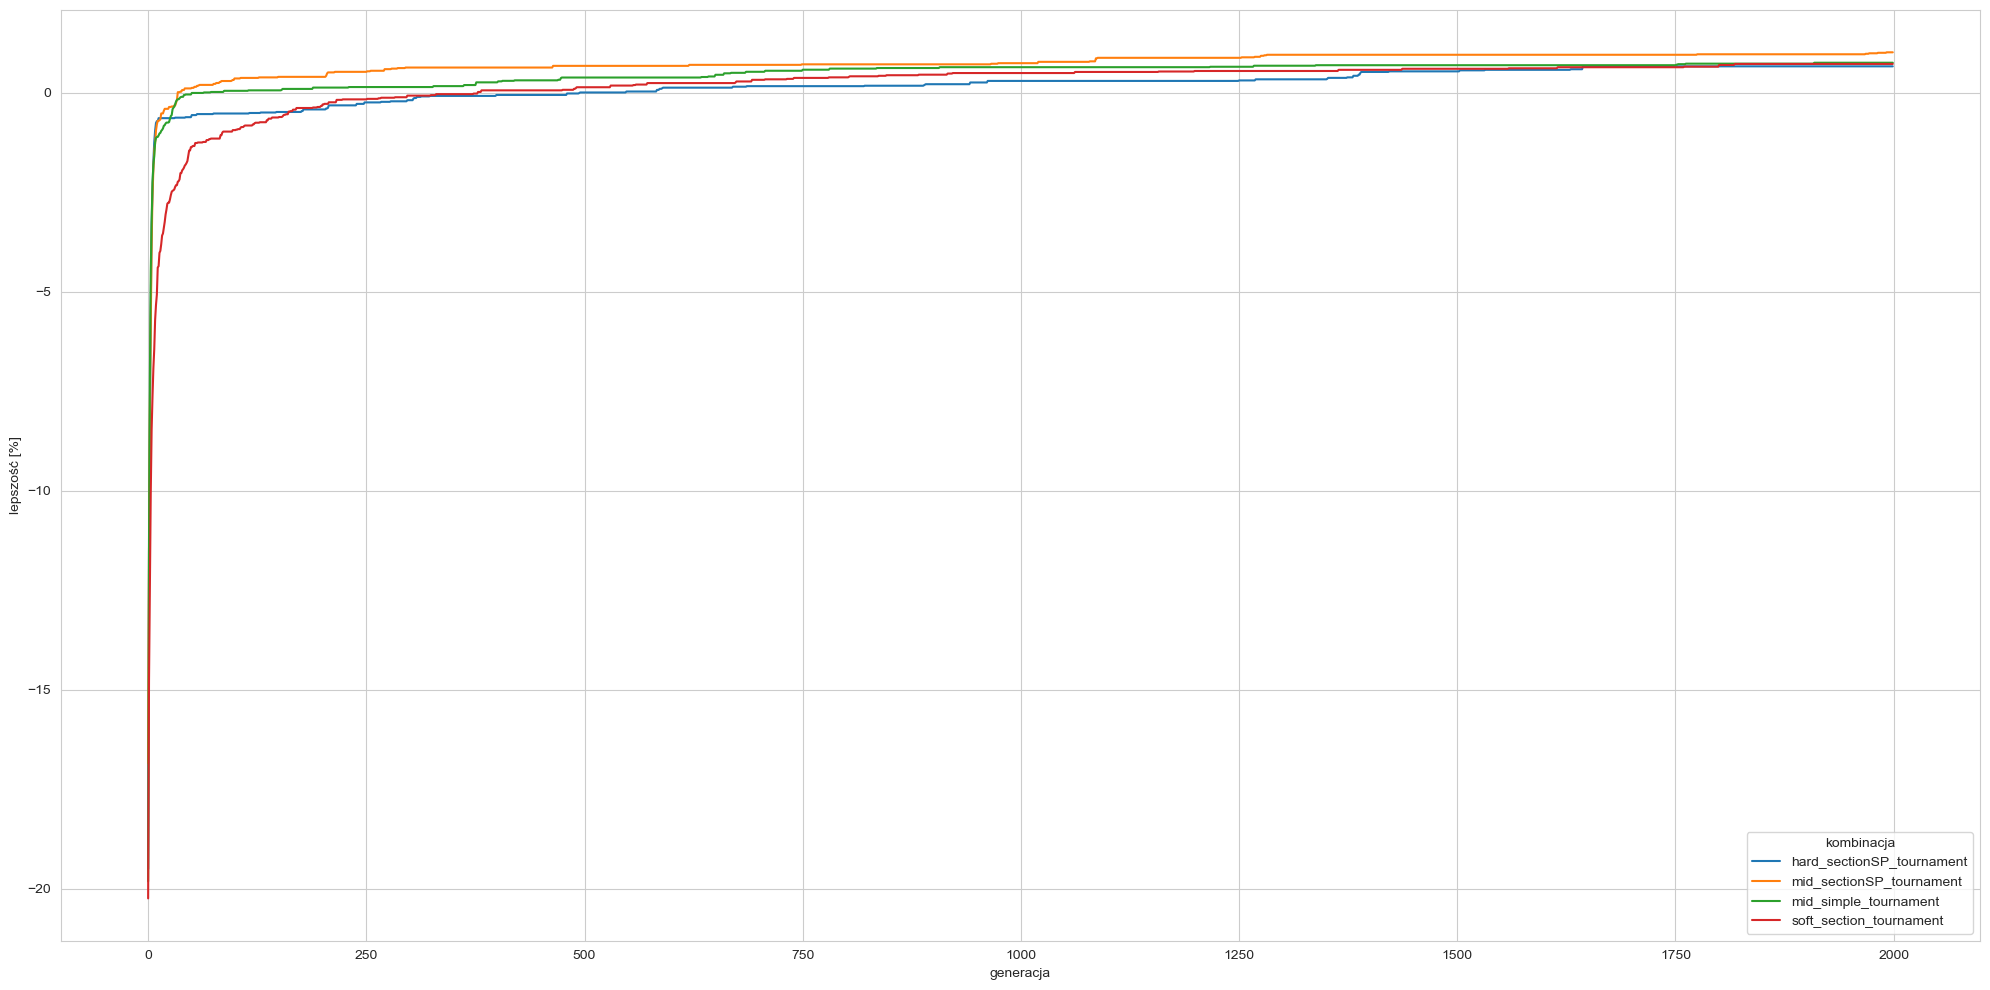

In [26]:
best_combo = final_2['kombinacja'].unique()
best_combo = best_combo.tolist()
best_combo = best_combo + (final_1['kombinacja'].unique()).tolist()

sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generacja", y = "Względne odchylenie procentowe [%]", data=mean_for_each_config[mean_for_each_config["kombinacja"].isin(best_combo)], hue='kombinacja')
plt.tight_layout()
plt.show()


## Szukanie najlepszych hiperaparametrów przy pomocy metody przeszukiwania siatki

In [27]:
J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)


# Parametry algorytmu genetycznego
population_sizes = [50, 100, 200, 300]
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5]

# population_sizes = [50, 100]
# mutation_rates = [0.1, 0.2]

generations = 2000


In [28]:
results = []

for J in J_list:
    nehcmax = neh(J.copy())
    for i in range(len(best_combo)):
        mutation, crossover, selection = best_combo[i].split(sep="_")
        for pop_size in population_sizes:
            for mut_rate in mutation_rates:
                    ga = GeneticAlgorithm(J, 
                                pop_size, 
                                mut_rate, 
                                generations,
                                mutation_type=mutation, 
                                crossover_type=crossover, 
                                selection_type=selection)
                    best_solutions = ga.Genetic()
                    for i in range(len(best_solutions)):
                        best_solution = best_solutions[i]
                        best_solution_Cmax = C_Max(J,best_solution)
                        percentage = (nehcmax - best_solution_Cmax)
                        percentage = percentage/nehcmax
                        percentage = percentage * 100
                        results.append({'operatory': mutation+"_"+crossover+"_"+selection, 'kombinacja': mutation+"_"+crossover+"_"+selection+", rozmiar populacji: "+str(pop_size)+", częstość mutacji: "+str(mut_rate),'rozmiar_populacji':str(pop_size), 'częstość_mutacji': str(mut_rate), 'generacja': i,'Cmax': best_solution_Cmax, 'Względne odchylenie procentowe [%]': percentage})





best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df2 = pd.DataFrame(results)
df2.to_csv('data_combinations_results_params.csv', index=False)
df2.head(10)

,operatory,kombinacja,rozmiar_populacji,częstość_mutacji,generacja,Cmax,lepszość [%]
0,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,0,210,-20.689655
1,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,1,210,-20.689655
2,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,2,176,-1.149425
3,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,3,176,-1.149425
4,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,4,176,-1.149425
5,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,5,176,-1.149425
6,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,6,174,0.000000
7,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,7,174,0.000000
8,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,8,174,0.000000
9,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",50,0.1,9,174,0.000000


In [29]:
mean_for_each_config_1 = df2.groupby(['operatory','kombinacja','rozmiar_populacji','częstość_mutacji','generacja'],as_index=False).agg({'Względne odchylenie procentowe [%]':'mean'})
mean_for_each_config_1

,operatory,kombinacja,rozmiar_populacji,częstość_mutacji,generacja,lepszość [%]
0,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",100,0.1,0,-9.376639
1,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",100,0.1,1,-4.269903
2,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",100,0.1,2,-2.563832
3,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",100,0.1,3,-1.283685
4,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",100,0.1,4,-0.425225
...,...,...,...,...,...,...
159995,soft_section_tournament,"soft_section_tournament, rozmiar populacji: 50...",50,0.5,1995,0.999668
159996,soft_section_tournament,"soft_section_tournament, rozmiar populacji: 50...",50,0.5,1996,0.999668
159997,soft_section_tournament,"soft_section_tournament, rozmiar populacji: 50...",50,0.5,1997,0.999668
159998,soft_section_tournament,"soft_section_tournament, rozmiar populacji: 50...",50,0.5,1998,0.999668


#### Wykresy przedstawiające zależność średniego wyniku działania algorytmu, od nastrojenia hiperparametrów
### [5] Wybrane kombinacje z różnymi rozmiarami populacji dla częstości mutacji = 0.1
### [6] Wybrane kombinacje z różnymi rozmiarami populacji dla częstości mutacji = 0.2
### [7] Wybrane kombinacje z różnymi rozmiarami populacji dla częstości mutacji = 0.3
### [8] Wybrane kombinacje z różnymi rozmiarami populacji dla częstości mutacji = 0.4
### [9] Wybrane kombinacje z różnymi rozmiarami populacji dla częstości mutacji = 0.5

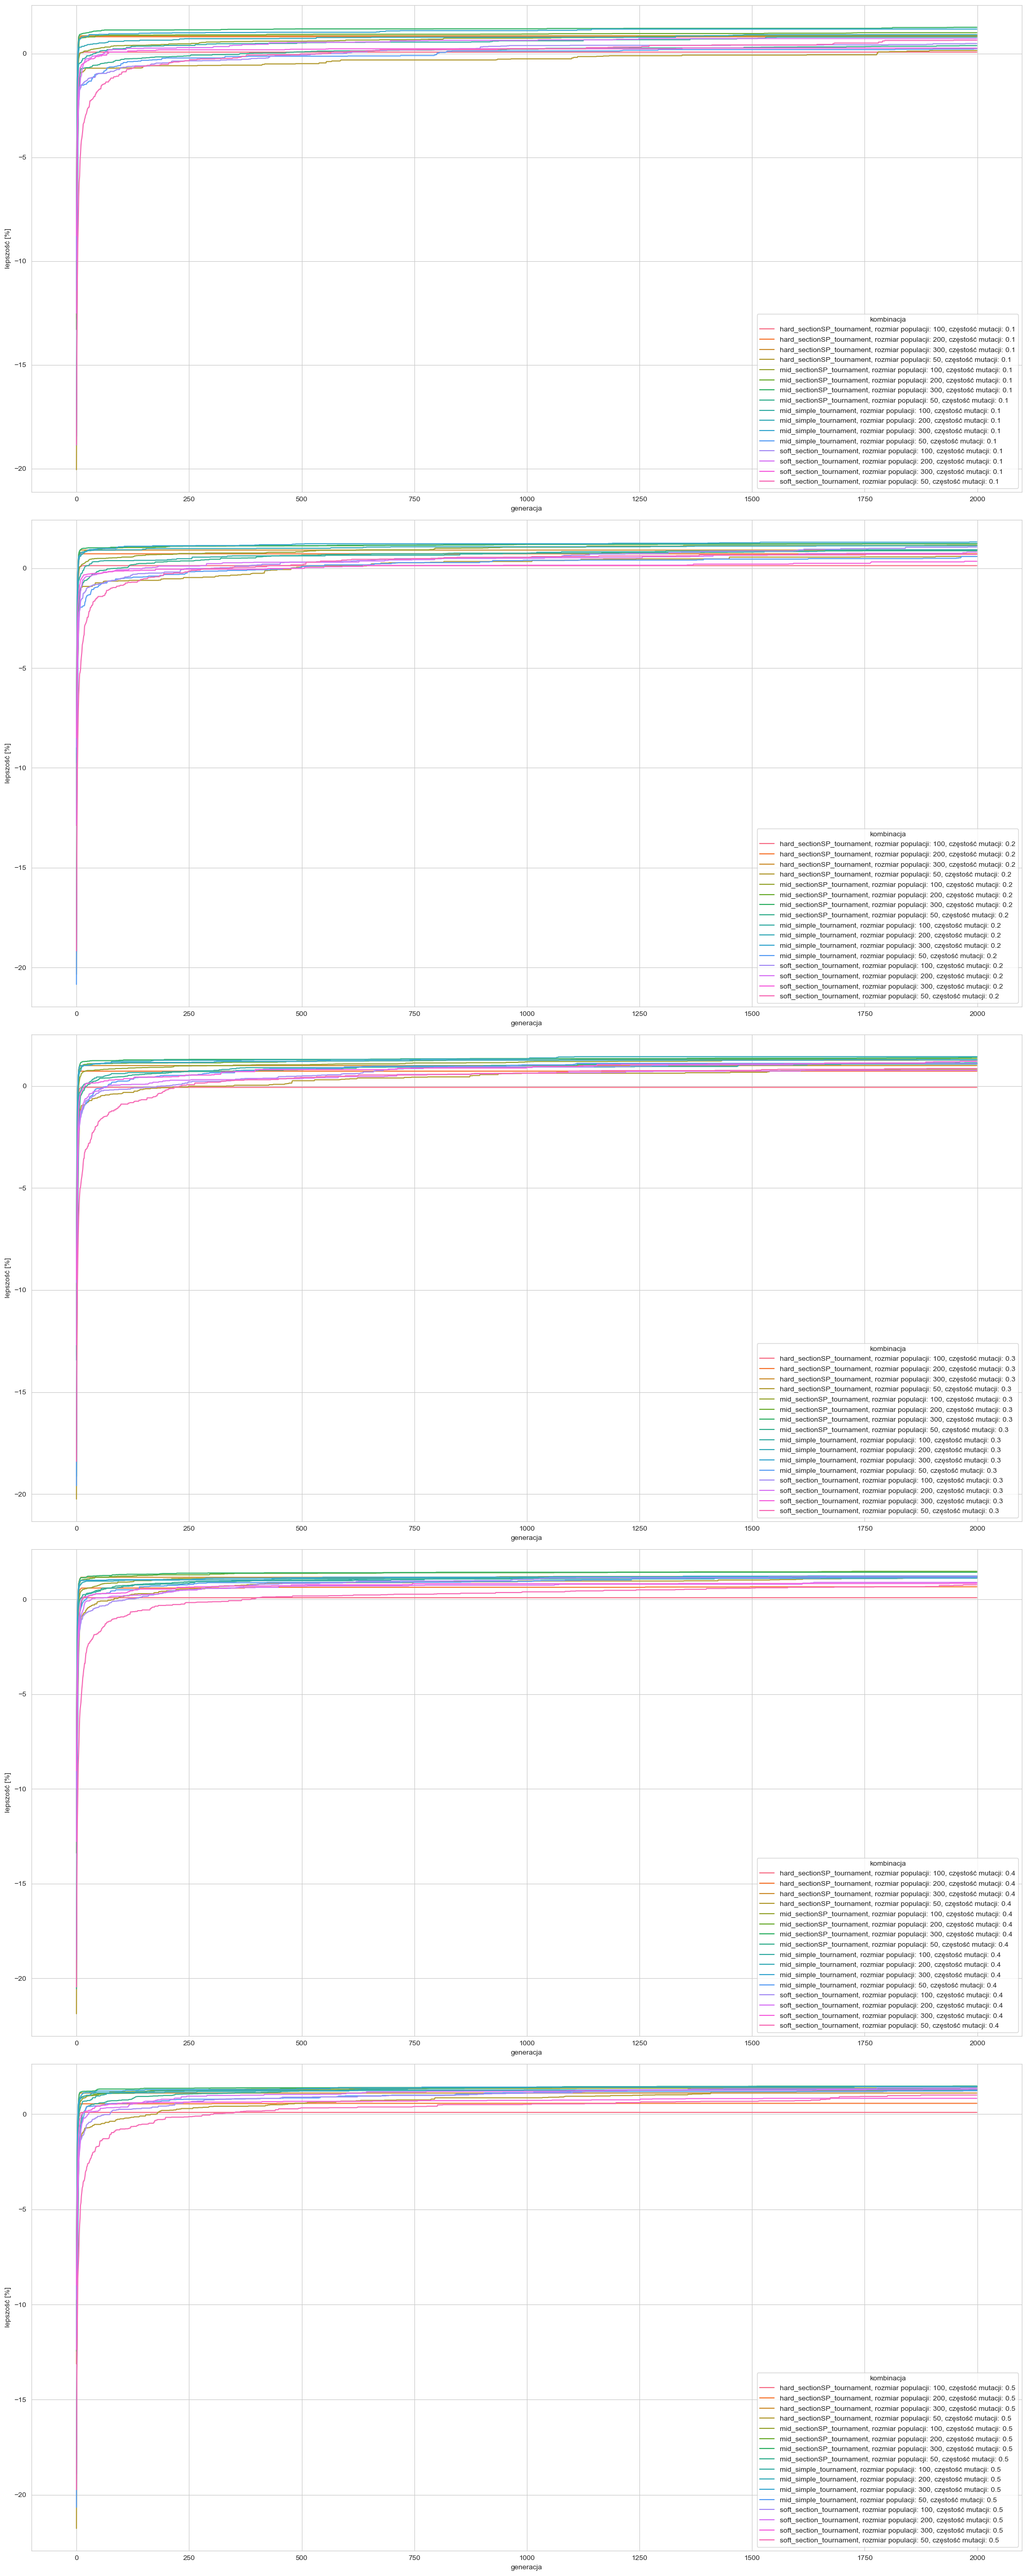

In [30]:
splitby2 = 'częstość_mutacji'
categories2 = df2[splitby2]
categories2 = categories2.unique()
l = len(categories2)

sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig,axis2 = plt.subplots(l,1,figsize=(20, 10*l))
for i in range(l):
    sns.lineplot(ax=axis2[i], x = "generacja", y = "Względne odchylenie procentowe [%]", data=mean_for_each_config_1[mean_for_each_config_1[splitby2]==categories2[i]], hue='kombinacja')

plt.tight_layout()
plt.show()

#### Kombinacja która średnio wypadła najlepiej

In [31]:
final_2 = df2[df2["generacja"].isin([df2["generacja"].max()])]
# print(final_2.head(10))
mean_for_each_config_final2 = final_2.groupby(['kombinacja'],as_index=False).agg({'Względne odchylenie procentowe [%]':'mean'})

final_f2 = mean_for_each_config_final2[mean_for_each_config_final2["Względne odchylenie procentowe [%]"].isin([mean_for_each_config_final2["Względne odchylenie procentowe [%]"].max()])]

print("kombinacja która wypadła średnio najlepiej:")
final_f2


kombinacja która wypadła średnio najlepiej:


,kombinacja,lepszość [%]
28,"mid_sectionSP_tournament, rozmiar populacji: 2...",1.487381


In [32]:
mean_for_each_config_final2 = final_2.groupby(['kombinacja','operatory'])['Względne odchylenie procentowe [%]'].mean()

mean_for_each_config_f2 = mean_for_each_config_final2.loc[mean_for_each_config_final2.groupby('operatory').idxmax()]

best_combo2 = [mean_for_each_config_f2.index[i][0] for i in range(len(mean_for_each_config_f2))]
best_combo2


['hard_sectionSP_tournament, rozmiar populacji: 50, częstość mutacji: 0.5',
 'mid_sectionSP_tournament, rozmiar populacji: 200, częstość mutacji: 0.4',
 'mid_simple_tournament, rozmiar populacji: 300, częstość mutacji: 0.5',
 'soft_section_tournament, rozmiar populacji: 100, częstość mutacji: 0.5']

In [33]:
best_combination_data2 = df2[df2["kombinacja"].isin(best_combo2)]
best_combination_data2 = best_combination_data2.groupby(['operatory','kombinacja','generacja'],as_index= False)['Względne odchylenie procentowe [%]'].mean()
best_combination_data2.head(10)


,operatory,kombinacja,generacja,lepszość [%]
0,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",0,-21.762239
1,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",1,-13.329958
2,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",2,-9.153979
3,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",3,-6.124945
4,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",4,-3.806982
5,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",5,-2.607101
6,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",6,-2.031535
7,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",7,-1.692492
8,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",8,-1.443730
9,hard_sectionSP_tournament,"hard_sectionSP_tournament, rozmiar populacji: ...",9,-1.250044


### [10] Wykres przedstawiający wybrane kombinacje dla ich najlepszych hiperparametrów

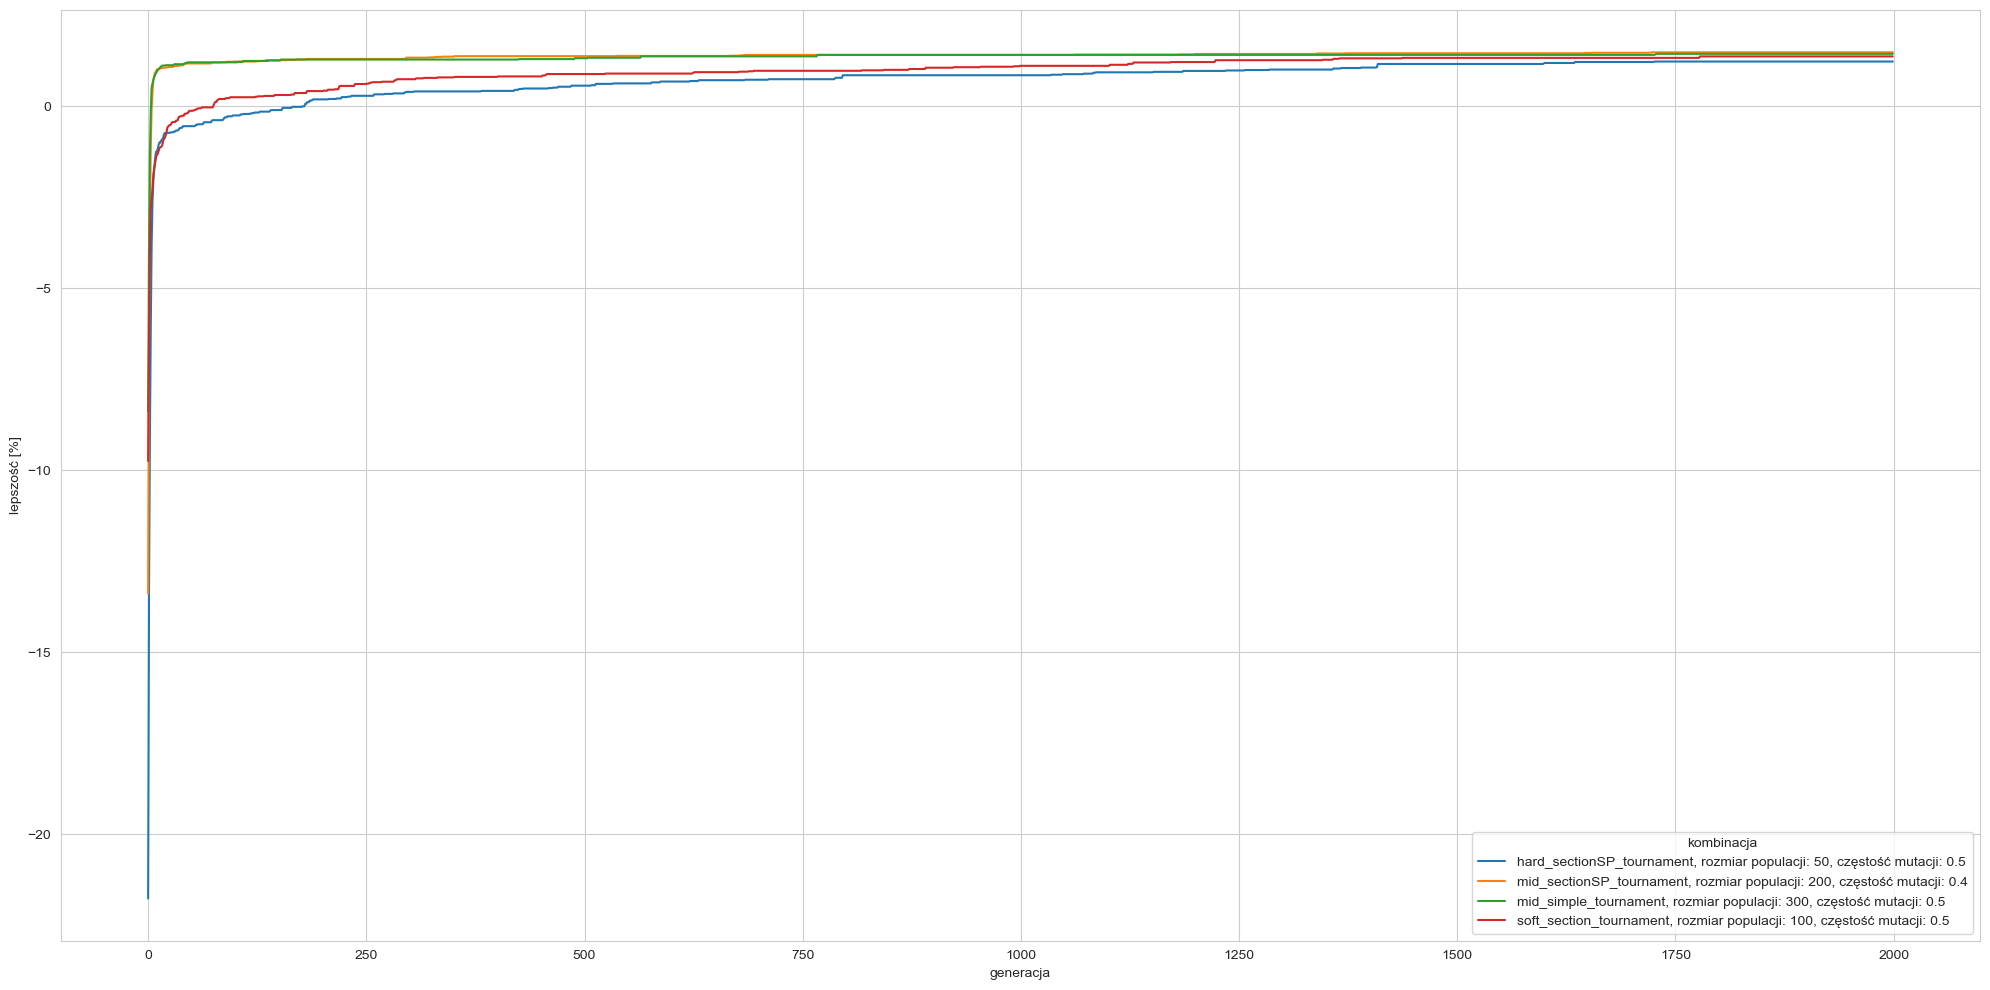

In [34]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generacja", y = "Względne odchylenie procentowe [%]", data=best_combination_data2, hue='kombinacja')

plt.tight_layout()
plt.show()

# Wnioski

## 1. Spośród zaimplementowanych metod selekcji najlepiej sprawdziła się selekcja turniejowa. Możliwe, że lepiej pasuje do idei algorytmu genetycznego niż ruletkowa, ponieważ bardziej bezpośrednio symuluje walkę organizmów o przetrwanie.
## 2. Na wykresie [10] widać, że przy dłuższym horyzoncie czasowym algorytm, niezależnie od wybranej kombinacji, dąży do podobnej jakości poprawy.
## 3. Ostateczny wykres ujawnia również, że rozmiar populacji jest parametrem silnie zależnym od dobranego zestawu funkcji. Natomiast w kontekście częstości mutacji najlepiej wypadły duże wartości z przewagą 0.5.
## 4. Z porównania wykresów [4] i [10] można wnioskować, że odpowiednie dostrojenie hiperparametrów wpływa przede wszystkim na jakość początkowych wyników algorytmów w generacjach z zakresu 0-750.
## 5. Wykres [3] pokazuje, że dla niektórych kombinacji mutacja typu "soft" była zbyt słaba, co spowodowało, że część algorytmów na tym wykresie utknęła w minimum. Widać to po stagnacji wartości względem liczby generacji.